# Part II - Bikeshare Datasets Exploration for San Francisco, New York & Washington DC

## by Princewill Okechukwu

## Investigation Overview

For the Project Bikeshare Datasets Exploration for San Francisco, New York and Washington DC. 

#### Some Key Questions that will be answered with Insights are as follows:
-What is the distribution of the varible of interest(Trip Duration - minutes) across the three cities?

-What is Trip Duration like for each day of the week?

-What is Trip duration like for each Period of day?

-What is the proportion of usertype for each gender ?

## Dataset Overview

The df_sf containing Bikeshare data for San Francisco Greater Bay Area contains 183412 observations with 16 variables, this is the primary dataset.The other  2 datasets are :
-New York City dataset which contains 943744 observations and 15 variables.
-Washington DC Metro area dataset which contains 158130 observations and 9 variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_sf= pd.read_csv('201902-fordgobike-tripdata.csv') #San Franciso bike share data
df_nyc = pd.read_csv('201902-citibike-tripdata.csv') #NYC Bike share data
df_dc = pd.read_csv('201902-capitalbikeshare-tripdata.csv') #washington metro area 

In [3]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df_sf.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df_sf.isnull().sum()
#missing = df_sf[df_sf['member_birth_year'].isna()]

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df_sf.isnull().sum()
#missing = df_sf[df_sf['member_birth_year'].isna()]

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943744 entries, 0 to 943743
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             943744 non-null  int64  
 1   starttime                943744 non-null  object 
 2   stoptime                 943744 non-null  object 
 3   start station id         943735 non-null  float64
 4   start station name       943735 non-null  object 
 5   start station latitude   943744 non-null  float64
 6   start station longitude  943744 non-null  float64
 7   end station id           943735 non-null  float64
 8   end station name         943735 non-null  object 
 9   end station latitude     943744 non-null  float64
 10  end station longitude    943744 non-null  float64
 11  bikeid                   943744 non-null  int64  
 12  usertype                 943744 non-null  object 
 13  birth year               943744 non-null  int64  
 14  gend

In [7]:
df_nyc.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.437440e+05,943735.000000,943744.000000,943744.000000,943735.000000,943744.000000,943744.000000,943744.000000,943744.000000,943744.000000
mean,8.047733e+02,1614.552153,40.737283,-73.982164,1604.586391,40.737153,-73.982407,28968.990799,1979.224374,1.176684
std,7.509697e+03,1456.227953,0.030139,0.018546,1455.324186,0.029901,0.018603,6248.873530,12.176740,0.472637
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.043991,14529.000000,1885.000000,0.000000
25%,3.150000e+02,382.000000,40.718822,-73.994564,380.000000,40.718822,-73.994685,26013.000000,1970.000000,1.000000
50%,5.180000e+02,507.000000,40.738274,-73.985011,507.000000,40.738274,-73.985649,30929.000000,1982.000000,1.000000
75%,8.790000e+02,3263.000000,40.756604,-73.972826,3263.000000,40.756405,-73.973442,34045.000000,1989.000000,1.000000
max,2.403037e+06,3745.000000,40.866000,-73.881000,3745.000000,40.866000,-73.881000,37907.000000,2003.000000,2.000000


In [8]:
df_nyc.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           9
start station name         9
start station latitude     0
start station longitude    0
end station id             9
end station name           9
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [9]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158130 entries, 0 to 158129
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration              158130 non-null  int64 
 1   Start date            158130 non-null  object
 2   End date              158130 non-null  object
 3   Start station number  158130 non-null  int64 
 4   Start station         158130 non-null  object
 5   End station number    158130 non-null  int64 
 6   End station           158130 non-null  object
 7   Bike number           158130 non-null  object
 8   Member type           158130 non-null  object
dtypes: int64(3), object(6)
memory usage: 10.9+ MB


In [10]:
df_dc.describe()

,Duration,Start station number,End station number
count,158130.000000,158130.000000,158130.000000
mean,895.846348,31336.298798,31337.529811
std,2279.471680,228.353447,226.776089
min,60.000000,31000.000000,31000.000000
25%,349.000000,31203.000000,31206.000000
50%,577.000000,31264.000000,31262.000000
75%,957.000000,31522.000000,31523.000000
max,86100.000000,32407.000000,32407.000000


In [11]:
df_dc.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

#### Handling Missing data in the df_sf

let us first make a copy of the datasets

In [12]:
df_sf_copy = df_sf.copy()
df_nyc_copy = df_nyc.copy()
df_dc_copy = df_dc.copy()

In [13]:
df_sf_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

For member birth_year we can replace the missing values with the median of the birth year 

In [14]:
df_sf_copy['member_birth_year'] = df_sf_copy['member_birth_year'].fillna(df_sf_copy['member_birth_year'].median())
df_sf_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [15]:
df_sf_copy.dropna(inplace= True)
df_nyc_copy.dropna(inplace=True)

#### converting the time columns to datetime data type

In [16]:
df_sf_copy['start_time'] = pd.to_datetime(df_sf_copy['start_time'])
df_sf_copy['end_time'] = pd.to_datetime(df_sf_copy['end_time'])
df_nyc_copy['starttime'] = pd.to_datetime(df_nyc_copy['starttime'])
df_nyc_copy['stoptime'] = pd.to_datetime(df_nyc_copy['stoptime'])
df_dc_copy['Start date'] = pd.to_datetime(df_dc_copy['Start date'])
df_dc_copy['End date'] = pd.to_datetime(df_dc_copy['End date'])


Converting 'duration_sec' to minutes in df_sf_copy to be uniform with the other datasets

In [17]:
df_sf_copy['duration_min'] = [x/60 for x in df_sf_copy['duration_sec']]
df_sf_copy['duration_min'] = df_sf_copy['duration_min'].round(1)
df_sf_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.9


Converting 'tripduration' to minutes in df_nyc_copy to be uniform with the other datasets

In [18]:
df_nyc_copy['duration_min'] = [x/60 for x in df_nyc_copy['tripduration']]
df_nyc_copy['duration_min'] = df_nyc_copy['duration_min'].round(1)
df_nyc_copy.head(2)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_min
0,219,2019-02-01 00:00:06.257,2019-02-01 00:03:46.109,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1,3.6
1,143,2019-02-01 00:00:28.032,2019-02-01 00:02:51.746,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1,2.4


Converting 'Duration' to minutes in df_dc_copy to be uniform with other datasets

In [19]:
df_dc_copy['duration_min'] = [x/60 for x in df_dc_copy['Duration']]
df_dc_copy['duration_min'] = df_dc_copy['duration_min'].round(1)
df_dc_copy.head(2)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,duration_min
0,206,2019-02-01 00:00:20,2019-02-01 00:03:47,31509,New Jersey Ave & R St NW,31636,New Jersey Ave & N St NW/Dunbar HS,W21713,Member,3.4
1,297,2019-02-01 00:04:40,2019-02-01 00:09:38,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,E00013,Member,5.0


In [20]:
df_dc_copy.duration_min.describe()

count    158130.000000
mean         14.930754
std          37.991146
min           1.000000
25%           5.800000
50%           9.600000
75%          16.000000
max        1435.000000
Name: duration_min, dtype: float64

Doing some Feature Engineering to extract age as of 2019 for df_sf_copy and df_nyc_copy

In [21]:
df_sf_copy['age'] = [int(2019 - x) for x in df_sf_copy['member_birth_year']]
df_nyc_copy['age'] = [int(2019 - x) for x in df_nyc_copy['birth year']]

Extract Hour() and day of week from the start time columns 

In [22]:
df_sf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [23]:
df_sf_copy['hour'] = df_sf_copy['start_time'].dt.hour
df_nyc_copy['hour'] = df_nyc_copy['starttime'].dt.hour
df_dc_copy['hour']= df_dc_copy['Start date'].dt.hour

Let's have a function for Period of the Day

In [24]:
df_sf_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,hour
95440,762,2019-02-15 13:42:09.457,2019-02-15 13:54:51.464,138.0,Jersey St at Church St,37.750900,-122.427411,95.0,Sanchez St at 15th St,37.766219,-122.431060,4902,Subscriber,1979.0,Male,No,12.7,40,13
25692,462,2019-02-25 16:22:10.706,2019-02-25 16:29:53.321,22.0,Howard St at Beale St,37.789756,-122.394643,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5247,Subscriber,1990.0,Female,No,7.7,29,16
73520,770,2019-02-19 13:25:05.753,2019-02-19 13:37:55.795,200.0,2nd Ave at E 18th St,37.800214,-122.253810,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,3270,Subscriber,1987.0,Female,No,12.8,32,13
90603,374,2019-02-16 12:04:51.450,2019-02-16 12:11:05.734,196.0,Grand Ave at Perkins St,37.808894,-122.256460,182.0,19th Street BART Station,37.809013,-122.268247,578,Subscriber,1993.0,Female,No,6.2,26,12
152256,905,2019-02-06 16:02:58.356,2019-02-06 16:18:04.308,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,22.0,Howard St at Beale St,37.789756,-122.394643,5017,Subscriber,1999.0,Male,No,15.1,20,16
142253,362,2019-02-07 17:18:23.612,2019-02-07 17:24:26.292,64.0,5th St at Brannan St,37.776754,-122.399018,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3614,Subscriber,1980.0,Male,No,6.0,39,17
176956,1597,2019-02-02 09:16:20.692,2019-02-02 09:42:58.129,126.0,Esprit Park,37.761634,-122.390648,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5411,Customer,1990.0,Male,No,26.6,29,9
149497,660,2019-02-06 19:10:27.511,2019-02-06 19:21:27.769,70.0,Central Ave at Fell St,37.773311,-122.444293,119.0,18th St at Noe St,37.761047,-122.432642,5168,Subscriber,1985.0,Male,No,11.0,34,19
73982,500,2019-02-19 11:58:34.902,2019-02-19 12:06:55.198,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58.0,Market St at 10th St,37.776619,-122.417385,4728,Subscriber,1998.0,Male,No,8.3,21,11
104252,1005,2019-02-14 08:37:53.465,2019-02-14 08:54:38.844,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,6446,Subscriber,1968.0,Other,No,16.8,51,8


In [25]:
def day_period(x):
    """
    This function returns the period of the day based on the hour of the day given. 
    
    Returns : Early Morning: If the Hour of the day is less than 08:00
    
              Late Morning: If the Hour of the day is 09:00 or greater, but less than 12:00. 
              
              Early Afternoon: If the Hour of the day is 12:00 or greater, but less than 15:00
              
              Late Afternoon: If the Hour of the day is 15:00 or greater, but less than 17:00
              
              Early Evening: If the Hour of the day is 17:00 or greater, but less than 20:00
              
              Late Evening: if the Hour of the day is 20:00 or greater
    """
    if (x < 9):
        return 'Early Morning'
    elif (x >= 9 and x < 12):
        return 'Late Morning'
    elif (x >=12 and x < 15 ):
        return 'Early Afternoon'
    elif (x >= 15 and x <17):
        return 'Late Afternoon'
    elif (x >= 17 and x < 20):
        return 'Early Evening'
    else:
        return 'Late Evening'

In [26]:
df_sf_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)
df_nyc_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)
df_dc_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)


Extracting Day of Week 

In [27]:
df_sf_copy['day_of_week'] = df_sf_copy['start_time'].dt.strftime('%A')
df_nyc_copy['day_of_week'] = df_nyc_copy['starttime'].dt.strftime('%A')
df_dc_copy['day_of_week']= df_dc_copy['Start date'].dt.strftime('%A')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


###  What is the distribution of Trip Duration in minutes for the 3 Cities?

From the Log Plot of the 3 Trip Duration(min) we can see observe that the 3 Cities have somewhat similar shaped distribution. The Trip duration for the 3 Cities is fairly Unimodal, with San Francisco having close peaks around 8 minutes and 12 mins. New York City and Washington DC are Unimodal with their peaks around 8 minutes and 10 minutes respectively.

In [28]:
def city_dist(city,name):
        binsize = 0.025
        bins = 10 ** np.arange(0, 1.778+binsize, binsize)
        plt.hist(data = city, x = 'duration_min', bins = bins);
        plt.xscale('log')
        x_ticks=[1,2,4,8,16,32,64]
        plt.xticks(x_ticks,x_ticks)
        plt.xlabel('Trip Duration(min)')
        plt.ylabel('Frequency')
        plt.title('Trip Duration(min) for {}'.format(name));



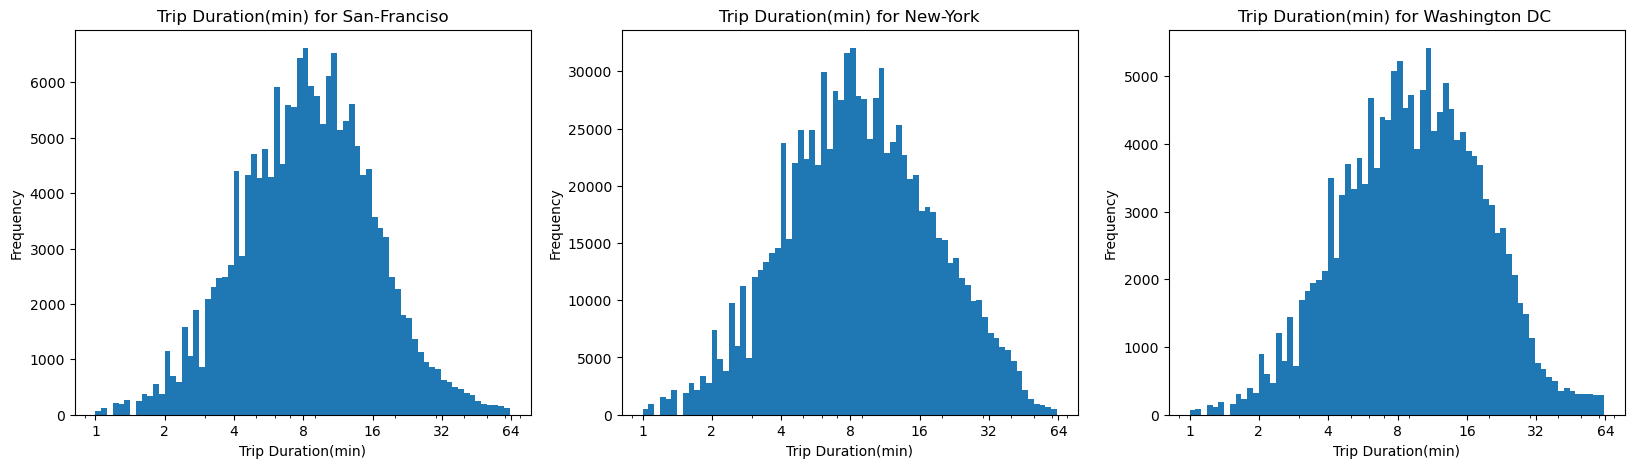

In [32]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC ']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    city_dist(city[0],city[1])
    i += 1

From the distribution, we can see that there are outlier variables that are heavily skewing the dataset. we will investigate the summary statistic and subset the data to remove most outliers


Text(0.5, 1.0, 'Trip Duration(min) Washington')

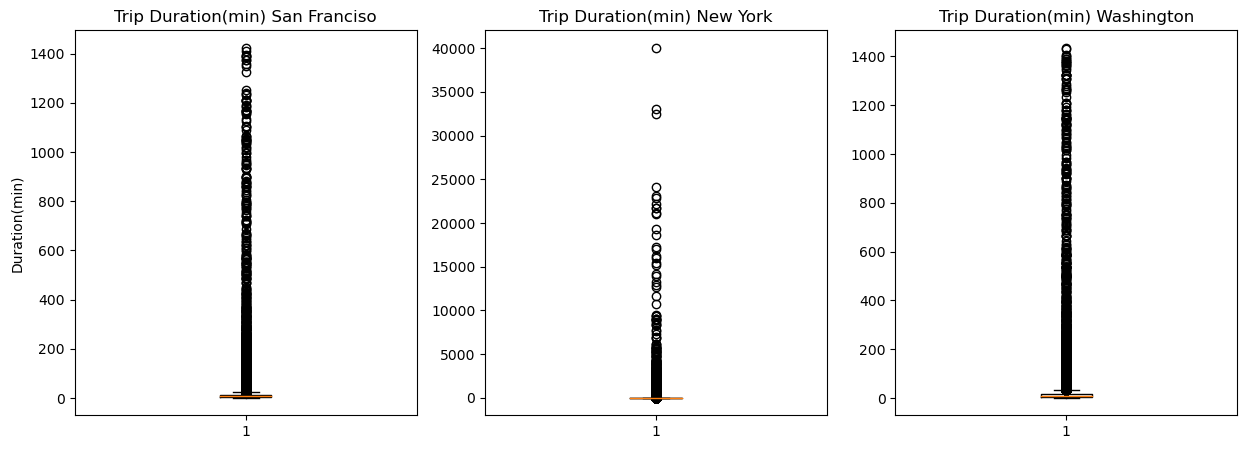

In [38]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1,3,1)
plt.boxplot(df_sf_copy.duration_min)
plt.ylabel('Duration(min)')
plt.title('Trip Duration(min) San Franciso')

plt.subplot(1,3,2)
plt.boxplot(df_nyc_copy.duration_min)
plt.title('Trip Duration(min) New York')

plt.subplot(1,3,3)
plt.boxplot(df_dc_copy.duration_min)
plt.title('Trip Duration(min) Washington')

Looking at the three dataset trip duration variables, we can see that there are some Outliers in the datasets, However these outliers are less than 2% of the datasets. We can subset the datasets and get trip durations lesser than or equal to 60 Minutes (3600 secs)

In [39]:
df_sf_copy = df_sf_copy[df_sf_copy.duration_min <= 60]
df_sf_copy.shape

(181512, 21)

In [40]:
df_nyc_copy = df_nyc_copy[df_nyc_copy.duration_min <= 60]
df_nyc_copy.shape

(939105, 20)

In [41]:
df_dc_copy = df_dc_copy[df_dc_copy.duration_min <= 60]
df_dc_copy.shape

(154879, 13)

#### Re-Plotting the Trip Distribution after subsetting using log scale to eliminate long tails

In [42]:
np.log10([df_sf_copy.duration_min.describe(),df_nyc_copy.duration_min.describe(),df_dc_copy.duration_min.describe()])

array([[5.25890534, 1.01672941, 0.87445606, 0.        , 0.73239376,
        0.92941893, 1.1172713 , 1.77815125],
       [5.97271415, 1.05510673, 0.94702057, 0.        , 0.71600334,
        0.93449845, 1.161368  , 1.77815125],
       [5.18999254, 1.07144204, 0.93340454, 0.        , 0.76342799,
        0.97312785, 1.18752072, 1.77815125]])

From the Log Plot of the 3 Trip Duration(min) we can see observe that the 3 Cities have somewhat similar shaped distribution. The Trip duration for the 3 Cities is fairly Unimodal, with Franciso having close peaks around 8 minutes and 12 mins. New York City and Washington DC are Unimodal with their peaks around 8 minutes and 10 minutes respectively.

### 2. What is the member's Age for San Franciso and New York Cities? 

Text(0.5, 1.0, 'Age Distribution for New York City members')

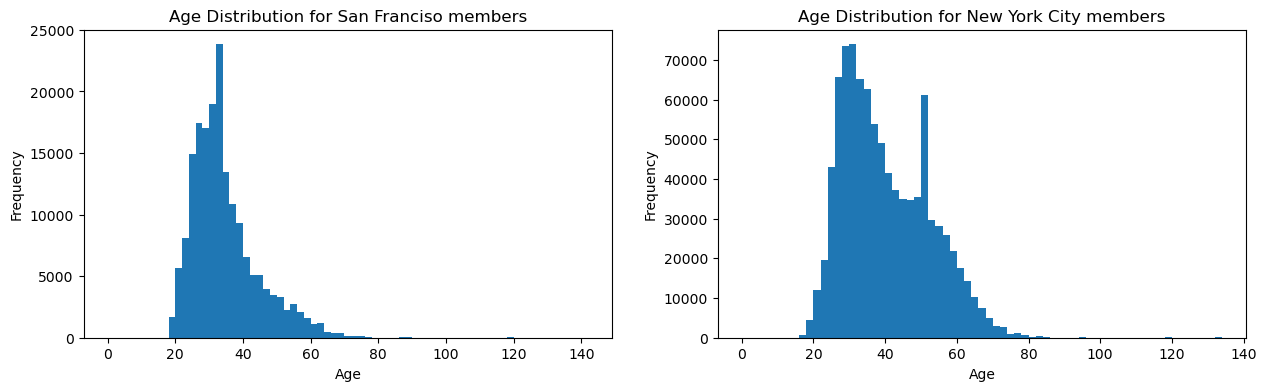

In [44]:
plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
bins = np.arange(0, df_sf_copy.age.max()+2, 2)
plt.hist(data = df_sf_copy, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for San Franciso members')

plt.subplot(1,2,2)
bins = np.arange(0, df_nyc_copy.age.max()+2, 2)
plt.hist(data = df_nyc_copy, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for New York City members')

As seen from the histogram plot the Age distribution for San Franciso members is Unimodal and skewed to the right with peak at age 34 - 36, while the age distribution for San Franciso is Fairly Bimodal with peaks at age 28-30 and age 50-52. 

### 3. What is the  Gender Proportion For Bike Sharers in San Franciso and New York?

Making the df_nyc_copy (New York) Gender Column Uniform with that of df_sf_copy (San Franciso)

In [45]:
df_nyc_copy['gender']= df_nyc_copy['gender'].replace([0,1,2],['others','Male','Female'])

In [46]:
df_nyc_copy.gender.value_counts()

Male      701132
Female    202571
others     35402
Name: gender, dtype: int64

In [65]:
df_sf_copy = df_sf_copy.rename(columns={'member_gender':'gender'})

In [68]:
def gender_dist(city,name):
    city_val = city.gender.value_counts()
    n_sum = city.gender.value_counts().sum() #Total sum of values
    max_val = city.gender.value_counts()[0] #Max Value
    order_w = city.gender.value_counts().index
    max_prop = max_val/n_sum
    tick_props = np.arange(0, max_prop+0.2, 0.2)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plt.figure(figsize=[15,3])

    sb.countplot(data=city, x='gender',color=sb.color_palette()[i-2],order=order_w);
    plt.yticks(tick_props*n_sum,tick_names)
    locs, labels = plt.xticks(rotation=0)
    for loc, label in zip(locs, labels):
        count = city_val[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_sum)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')    
    plt.ylabel('Proportion')
    plt.xlabel('Gender')
    plt.title('Gender  Distribution for {} Bike Sharers'.format(name))

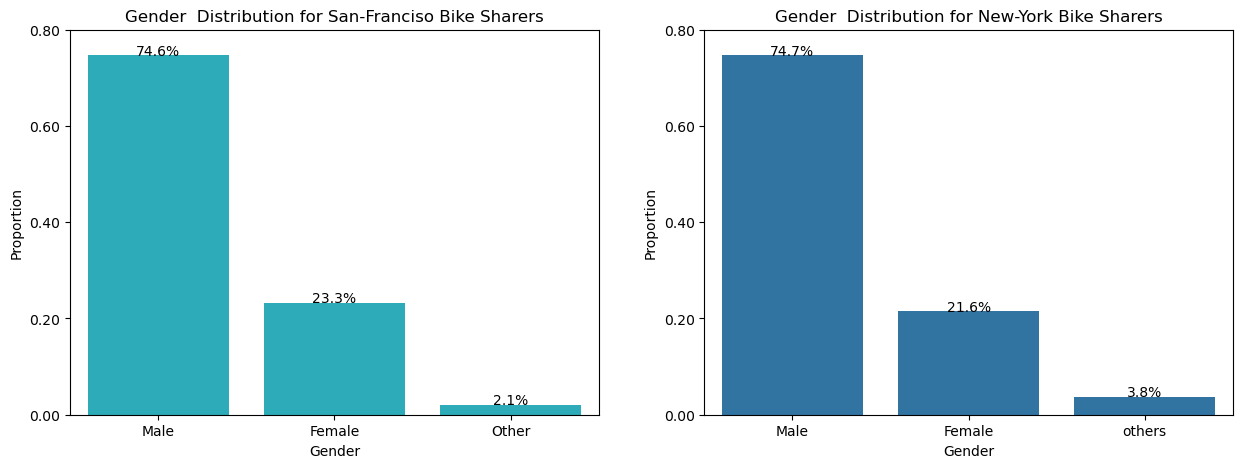

In [69]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York']]

i=1

plt.figure(figsize=[15,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    gender_dist(city[0],city[1])
    i += 1

From the Gender distribution of the Two cities we can see that there are similarities in the male gender proportion in both cities, but the female proportion in San Franciso (23.3%) is slightly higher than the female proportion in New york(21.6%). Also a larger proportion of people are in the others category for New York compared to San Franciso.

### 4. What is the distribution for User Type across the 3 cities 

In [70]:
df_dc_copy.rename(columns={'Member type':'user_type'},inplace=True)

In [71]:
df_nyc_copy.rename(columns={'usertype':'user_type'},inplace=True)

In [72]:
def user_type_dist(city,name):
    city_val = city.user_type.value_counts()
    n_sum = city.user_type.value_counts().sum() #Total sum of values
    max_val = city.user_type.value_counts()[0] #Max Value
    order_w = city.user_type.value_counts().index
    max_prop = max_val/n_sum
    tick_props = np.arange(0, max_prop+0.2, 0.2)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plt.figure(figsize=[15,3])

    base_color = sb.color_palette()[0]
    sb.countplot(data=city, x='user_type',color=sb.color_palette()[i-2],order=order_w);
    plt.yticks(tick_props*n_sum,tick_names)
    locs, labels = plt.xticks(rotation=0)
    for loc, label in zip(locs, labels):
        count = city_val[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_sum)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')    
    plt.ylabel('Proportion')
    plt.xlabel('User Type')
    plt.title('User-Type  Distribution for {} Bike Sharers'.format(name))

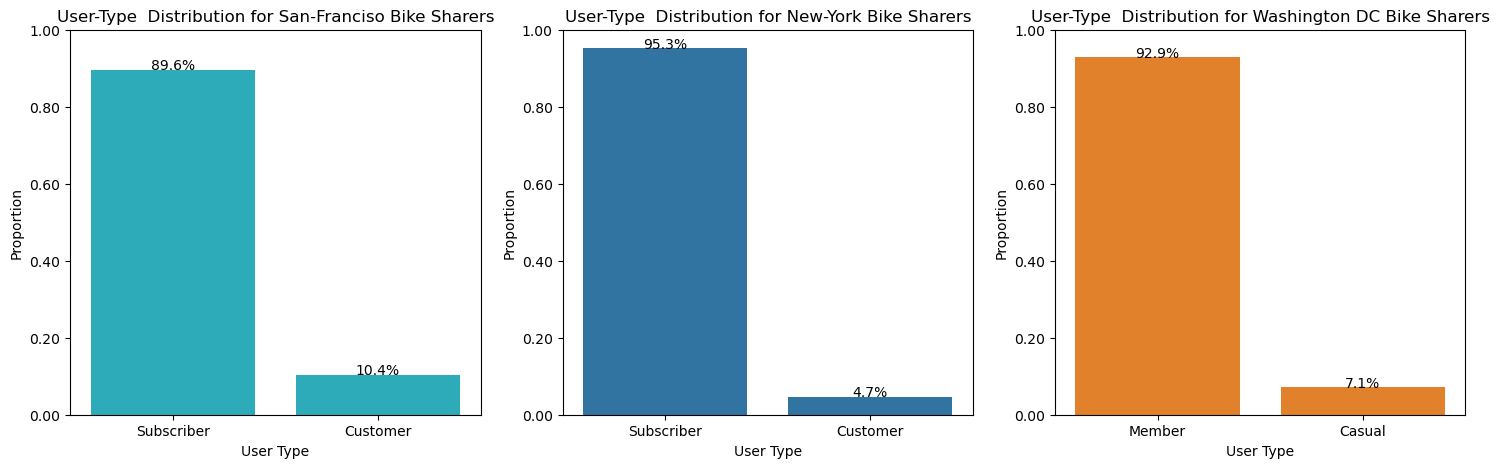

In [73]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[18,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    user_type_dist(city[0],city[1])
    i += 1

From User type distribution chart, it can be observed that New York City Bike sharers had the highest ratio of subcribers to customers who use the Bike sharing service, followed closely by Washington then San Franciso.

### 5. What days of the week Received the Highest Traffic ?

Let's set the categories for both the Day of the week and Period of the day.

In [74]:
df_sf_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'gender', 'bike_share_for_all_trip',
       'duration_min', 'age', 'hour', 'period_of_day', 'day_of_week'],
      dtype='object')

In [75]:
cities = [df_sf_copy,df_nyc_copy,df_dc_copy]

ordinal_var_dict = {'period_of_day': ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Early Evening','Late Evening'],
                    'day_of_week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}

for city in cities:
    for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        city[var] = city[var].astype(ordered_var)

#### Day of the Week  Traffic Distribution among the 3 Cities

In [76]:
def day_week(city,name):
        sb.countplot(data=city, x='day_of_week',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Day of week Traffic - {}'.format(name))


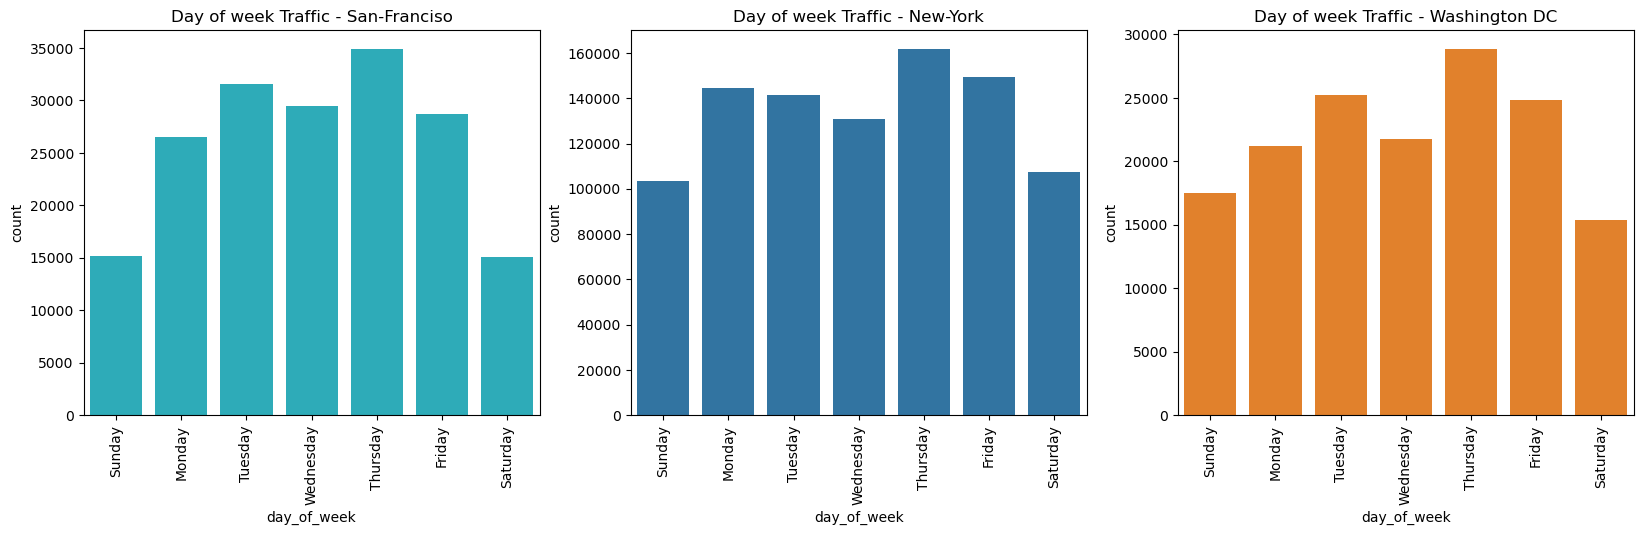

In [77]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    day_week(city[0],city[1])
    i += 1

As seen from the Day of week chart , Thursday is the day with the most traffic common in the 3 Cities. For NYC, Friday is the next busiest day, while for both San Franciso and Washington DC, Tuesday is the next busy day.

#### Period of the Day Distribution among the 3 Cities

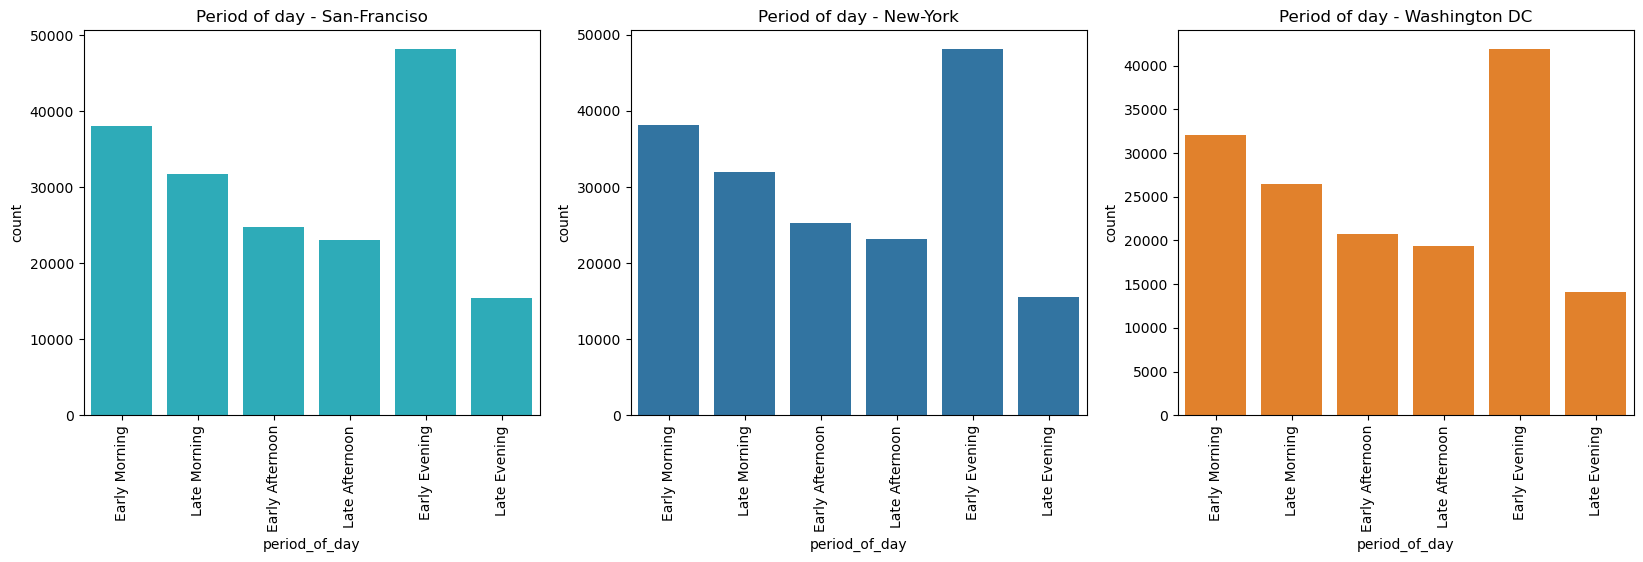

In [78]:
def day_period(city,name):
        sb.countplot(data=city, x='period_of_day',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Period of day - {}'.format(name))


city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    day_period(city[0],city[1])
    i += 1


For period of day traffic, we can see that the busiest time of the day amongst the 3 cities is Early Evening ( Between 5pm and 8pm daily) while the least Busiest time of the day is Late Evening (Between 8pm and midnight)



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

On the Trip Duration: I had to get rid of some outliers that were less than 2 percent of the dataset, also had to a log transformation to better depict the shape of the distribution.

From the Log Plot of the 3 Trip Duration(min) we can see observe that the 3 Cities have somewhat similar shaped distribution. The Trip duration for the 3 Cities is fairly Unimodal, with Franciso having close peaks around 8 minutes and 12 mins. New York City and Washington DC are Unimodal with their peaks around 8 minutes and 10 minutes respectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To get more interesting visualizations, more features were extracted from the existing data. These features are Age, period of the day and Day of the week were extracted from Start Date.

The distribution of the following variables were explored: Members Ages, User types, Gender,Day of the week ,Period of Day. These variables were explored for the three cities.

### Bivariate Distribution

### 6. How does Age Affects The Trip Duration for New York and San Franciso

To avoid over plotting, Let's first sample our data and use equal numbers for both cities.

In [79]:
df_sf_copy_sam = df_sf_copy.sample(3000)
df_nyc_copy_sam = df_sf_copy.sample(3000)

In [80]:
def age_trip(city,name):
    plt.scatter(data = city, x = 'age', y = 'duration_min', alpha = 1/20)
    plt.xlabel('Member Age')
    plt.ylabel('Trip Duration(min)')
    plt.title('Age vs Trip Duration {}'.format(name))

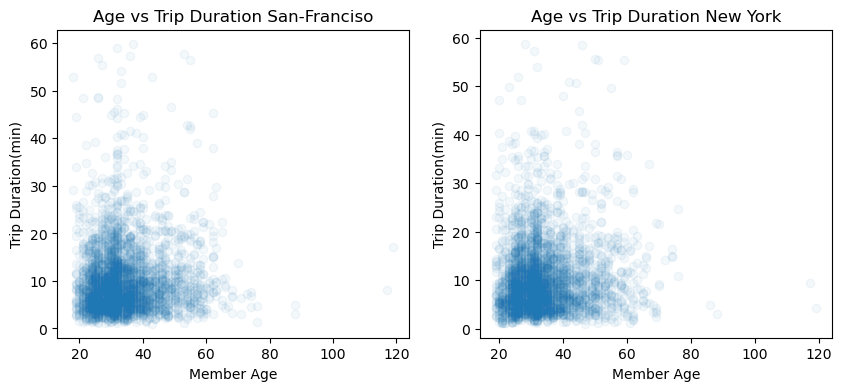

In [81]:
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
age_trip(df_sf_copy_sam,'San-Franciso')

plt.subplot(1,2,2)
age_trip(df_nyc_copy_sam,'New York')

From the scatter plot Visualization for How Age affects Trip Duration.Due to the dataset size difference, We decided to use a sample of 3000, We can see that Both Cities have a Similar scatter distribution with minor differences between both plots. 

### What is Trip Duration Distribution by Period of Day

   #### Our period of the day is as follows
  
         Early Morning: If the Hour of the day is less than 08:00
    
         Late Morning: If the Hour of the day is 09:00 or greater, but less than 12:00. 
              
         Early Afternoon: If the Hour of the day is 12:00 or greater, but less than 15:00
              
         Late Afternoon: If the Hour of the day is 15:00 or greater, but less than 17:00
              
         Early Evening: If the Hour of the day is 17:00 or greater, but less than 20:00
              
         Late Evening: if the Hour of the day is 20:00 or greater
         
         
From the above investigation , It can be seen that Early afternoon(Periods Bewteen 12pm - 3pm) Has the largest interquartile range, these means the distribution of Trip duration varies mostly in early afternoon than other periods of the day, Early afternoon also has the max duration value across the 3 cities. Also the median duration for late evenings(8pm - midnight) tends to be the lowest for the 3 cities.
      

In [82]:
def trip_by_day(city,name):
        sb.boxplot(data=df_sf_copy,x='period_of_day',y='duration_min',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Trip Duration by Period of day - {}'.format(name))
  
        
 


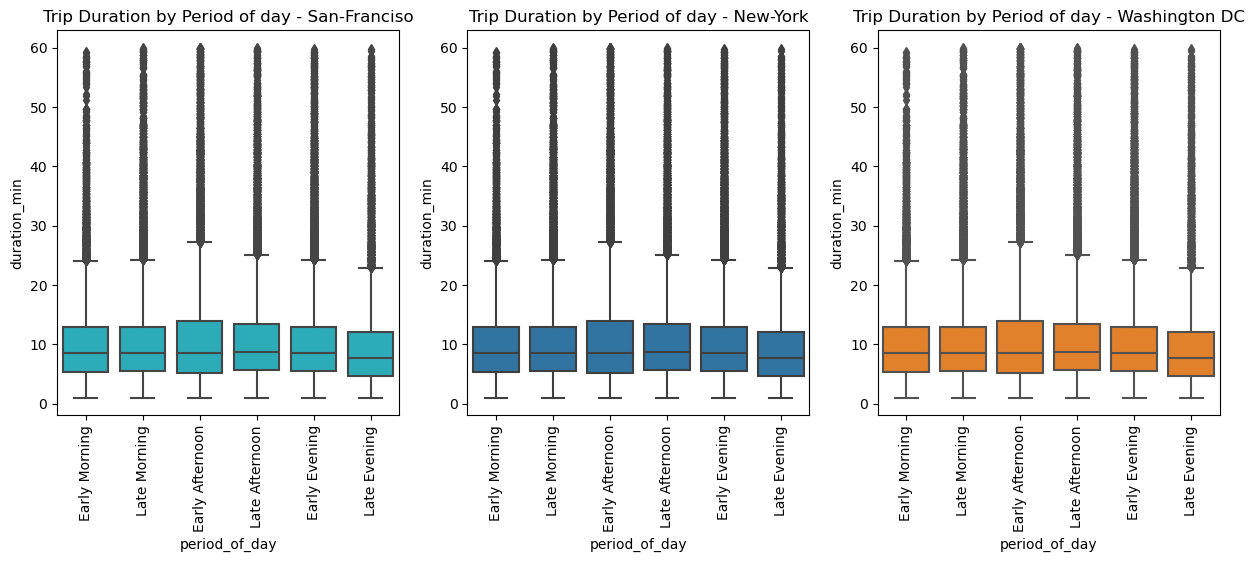

From the above investigation , It can be seen that Early afternoon(Periods Bewteen 12pm - 3pm) Has the largest interquartile range, these means the distribution of Trip duration varies mostly in early afternoon than other periods of the day, Early afternoon also has the max duration value across the 3 cities. Also the median duration for late evenings(8pm - midnight) tends to be the lowest for the 3 cities.

### What is Trip Duration By Day of the week?

From the box plots of day of week by duration, it can be observed that Saturday and Sundays have the biggest interquartile ranges for the 3 cities, This means that the duration for these days varies mostly Than the rest of the week.

In [84]:
def trip_day_week(city,name):
        sb.boxplot(data=df_sf_copy,x='day_of_week',y='duration_min',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Trip Duration by Day of Week - {}'.format(name))

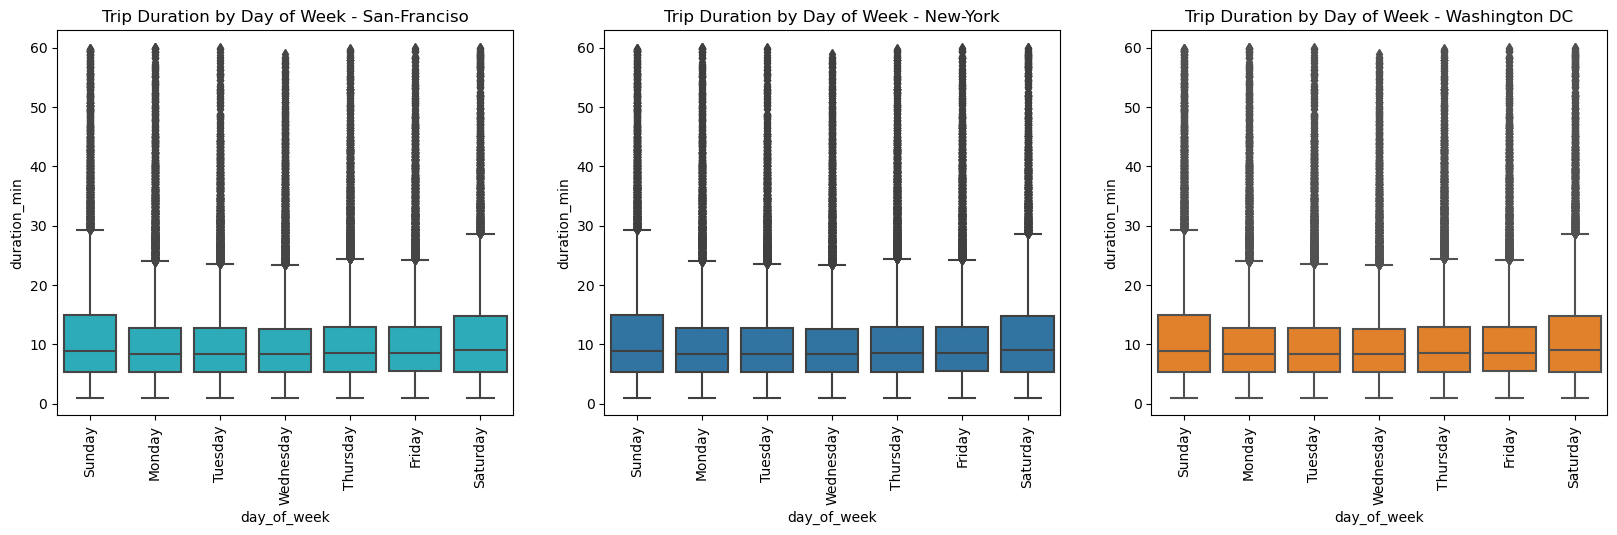

From the box plots of day of week by duration, it can be observed that Saturday and Sundays have the biggest interquartile ranges for the 3 cities, This means that the duration for these days varies mostly Than the rest of the week.

### How is User type represented in Gender for San Franciso and New York City?

From the Clustered Bar Chart It can be observed that the ratio of customers to subscribers for both male and female groups in San Francisco is higher than that for New York.

In [86]:
def user_gender(city,name):
        sb.countplot(data=city,x='gender',hue='user_type');
        plt.xticks(rotation=90);
        plt.title('UserType & Gender for each city - {}'.format(name))

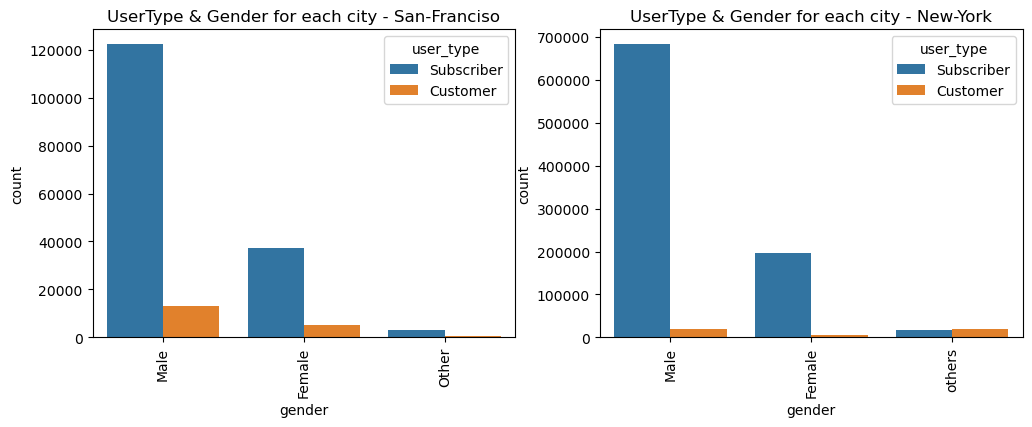

From the User Type by Gender Chart, it can be seen that the ratio of customers compared to Subcribers for both Male and Female in San Franciso is higher than that for New york.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### For Trip Duration vs Age
From the scatter plot Visualization for How Age affects Trip Duration.Due to the dataset size difference, We decided to use a sample of 5000, We can see that Both Cities have a Similar chart with minor differnces between both plots.

#### For Trip Duration Versus Period of the Day 
It can be seen that Early afternoon(Periods Bewteen 12pm - 3pm) Has the largest interquartile range, these means the distribution of Trip duration varies mostly in early afternoon than other periods of the day, Early afternoon also has the max duration value across the 3 cities. Also the median duration for late evenings(8pm - midnight) tend to be lower than the medians for the rest of the day.

#### For Trip Duration Vs Day of the Week
From the box plots of day of week by duration, it can be observed that Saturday and Sundays have the biggest interquartile ranges for the 3 cities, This means that the duration for these days are more spread out Than the rest of the week.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### For User type distribution across Gender
From the User Type by Gender Chart, it can be observed that the male and female proportion of customers compared to Subcribers is higher for San Franciso than for New york.

### Average Age and Trip Duration for 3 Cities

For San Franciso

In [88]:
df_sf_copy.groupby('user_type')[['duration_min','age']].mean()

,duration_min,age
user_type,,
Customer,15.218200,33.387934
Subscriber,9.835281,34.177402


For NYC

In [89]:
df_nyc_copy.groupby('user_type')[['duration_min','age']].mean()

,duration_min,age
user_type,,
Customer,19.919107,39.020882
Subscriber,10.931243,39.809416


For Washington DC

In [90]:
df_dc_copy.groupby('user_type')['duration_min'].mean()

user_type
Casual    22.683129
Member    10.949707
Name: duration_min, dtype: float64

## Multivariate Exploration



### 10. Let see how User_type and Gender play into Trip vs Age relationship for both San Franciso and New York Cities

To avoid over plotting, let's make use of the sample data set we created earlier

### For NYC

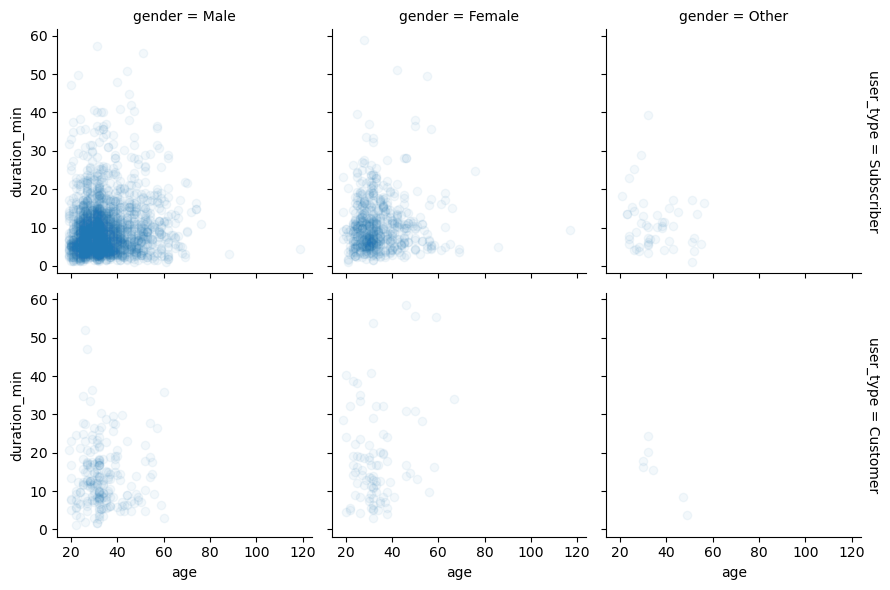

In [91]:
g = sb.FacetGrid(data=df_nyc_copy_sam,col='gender',row='user_type',margin_titles=True,col_order=['Male','Female','Other']);
g.map(plt.scatter,'age','duration_min',alpha=1/20);
#plt.title('User Type & Gender in Trip Duration vs Age for NYC')

### For San Franciso

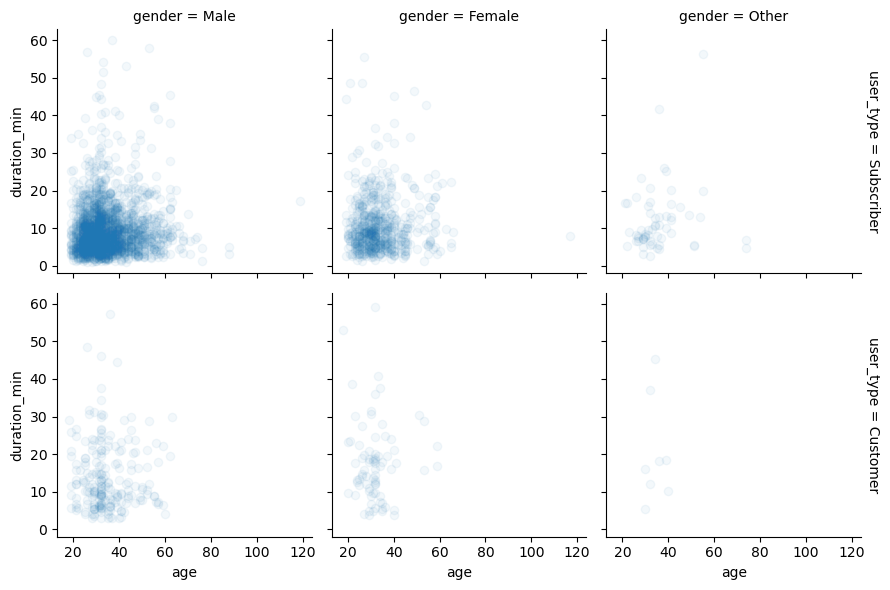

In [92]:
g = sb.FacetGrid(data=df_sf_copy_sam,col='gender',row='user_type',margin_titles=True,col_order=['Male','Female','Other'])
g.map(plt.scatter,'age','duration_min',alpha=1/20)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the FacetGrid Plots of both San Franciso and New York, We can see that San Franciso has a wider age spread that engage in bike sharing for longer time for both gender and user type. This is an important observation across both cities.


### Were there any interesting or surprising interactions between features?

Yes , the wider age spread in the Multivarite exploration including both gender and user type is more informative than the BiVariate distribution of Trip Duration vs Age across both cities that was investigated earlier.

## Conclusions
The project is investigating bike share datasets for San Franciso, New York and Washington DC. The purpose of the project was to explore the datasets to compare differences in variables across the 3 cities. The datasets were first wrangled to clean some missing data and some outlier observations. Other features were extracted to produce informative explorations. The variable of interest was the Trip duration (minutes), while other features extracted were : Gender,Age,Period of Day,Day of Week and User Type. while the results of these feature comparisons were similar across the three cities, some other features revealed some differences such as the age spread , Percentage of user type and Average Trip duration between Customers and Subcribers, for the three cities.